# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Amar Manfaluthi]
- **Email:** [nakayumi04@gmail.com]
- **ID Dicoding:** [amar_manfaluthi]

## Menentukan Pertanyaan Bisnis

- Bagaimana kenaikan dan penurunan jumlah penyewaan sepeda per bulan di tahun 2011 dan 2012?
- Bagaimana pengaruh musim pada jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Data pertama yang harus kita muat ialah data dari tabel day.

In [17]:
day_df = pd.read_csv('/content/drive/My Drive/project/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data selanjutnya yang harus kita muat ialah data dari tabel hour.

In [18]:
hour_df = pd.read_csv('/content/drive/My Drive/project/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Data pertama yang akan kita nilai adalah day_df. Sebagai permulaan, kita memeriksa tipe data data dan missing value dari tiap kolom yang terdapat dalam day_df.

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data diatas kita bisa lihat tidak ada missing value, tetapi terdapat ketidaksesuaian pada tipe data kolom dteday, dimana seharusnya bertipe data datetime dan bukan object.

Lalu kita akan memeriksa apakah terdapat duplicated data dan kita juga akan memeriksa parameter statistik dari day_df.

In [20]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kita lihat tidak terdapat duplikasi data dan tidak ada permasalahan pada parameter statistik

Selanjutnya kita akan menilai data hour_df. Pertama kita periksa tipe data dan missing value dari setiap kolom di hour_df

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari data diatas kita bisa lihat tidak ada missing value, tetapi terdapat ketidaksesuaian pada tipe data kolom dteday, dimana seharusnya bertipe data datetime dan bukan object.

Lalu kita akan memeriksa duplicated data dan parameter statistik pada data hour_df

In [22]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kita lihat tidak terdapat duplikasi data dan tidak ada permasalahan pada parameter statistik

### Cleaning Data

Setelah melakukan Assessing Data, kita bisa simpulkan bahwa hanya ada satu kesalahan yg sama di data day_df dan hour_df yaitu type data untuk dteday yang harusnya datetime bukan object. Maka pada Cleaning data ini kita akan mengganti tipe data kolom dteday dari object menjadi datetime

In [23]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Bisa kita lihat, setelah menjalankan code di atas, type data untuk kolom dteday sudah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [25]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada data di atas kita bisa melihat bahwa jumlah sewa paling sedikit dan jumlah sewa paling banyak. Sesuai dengan pertanyaan bisnis, kita akan melihat bagaimana jumlah sewa di tahun 2011 dan 2012, serta bagaimana musim mempengaruhi jumlah sewa

Code ini memperlihatkan jumlah persewaan sepeda per bulannya di tahun 2011 dan 2012

In [26]:
day_df['cnt'].sum()

3292679

In [27]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df.groupby(['year','month']).agg({'cnt': 'sum'})

cnt
year month        
2011 1       38189
     2       48215
     3       64045
     4       94870
     5      135821
     6      143512
     7      141341
     8      136691
     9      127418
     10     123511
     11     102167
     12      87323
2012 1       96744
     2      103137
     3      164875
     4      174224
     5      195865
     6      202830
     7      203607
     8      214503
     9      218573
     10     198841
     11     152664
     12     123713

Code ini memperlihatkan jumlah sewa di masing masing musim

In [28]:
season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_name'] = day_df['season'].map(season_name)

day_df.groupby('season_name').agg({'cnt': 'sum'})

,cnt
season_name,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


Menampilkan terdapat musim apa saja di tertentu

In [29]:
day_df.groupby('season_name').mnth.unique()

season_name
Fall         [6, 7, 8, 9]
Spring      [1, 2, 3, 12]
Summer       [3, 4, 5, 6]
Winter    [9, 10, 11, 12]
Name: mnth, dtype: object

In [30]:
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,season_name
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,2012,12,Spring
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,2012,12,Spring
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,2012,12,Spring
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,2012,12,Spring
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,2012,12,Spring


### Explore hour_df

Mengeksplor data di hour_df

In [31]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kenaikan dan penurunan jumlah penyewaan sepeda per bulan di tahun 2011 dan 2012?

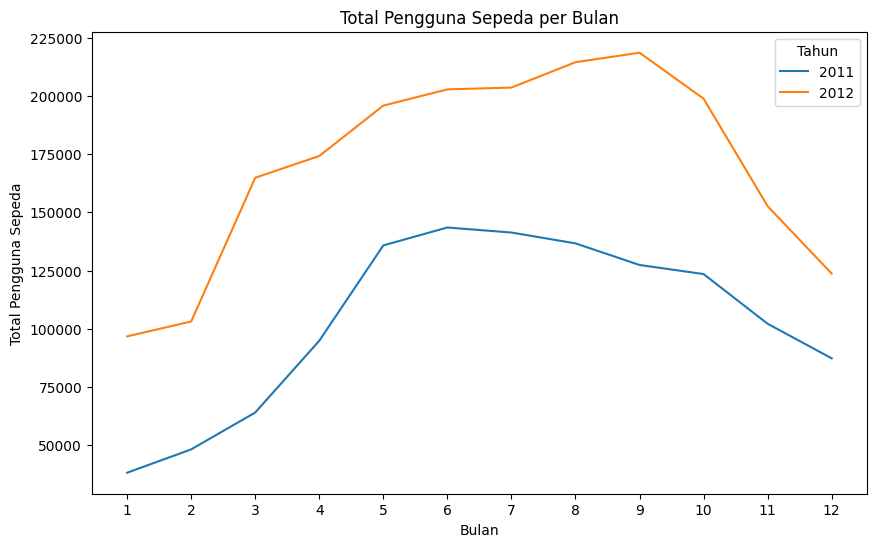

In [32]:
result = day_df.groupby(['year', 'month']).agg({'cnt': 'sum'})

# Mengatur indeks ulang agar 'year' dan 'month' menjadi kolom biasa
result.reset_index(inplace=True)

# Membuat line chart
plt.figure(figsize=(10, 6))
for year in result['year'].unique():
    year_data = result[result['year'] == year]
    plt.plot(year_data['month'], year_data['cnt'], label=str(year))

# Menambahkan judul dan label sumbu
plt.title('Total Pengguna Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Pengguna Sepeda')
plt.xticks(range(1, 13))
plt.legend(title='Tahun')

# Menampilkan grafik
plt.show()

Dari Line Chart ini kita dapat lihat bahwa di tahun 2011 dan 2012 terjadi peningkatan jumlah sewa sepeda di bulan yang berbeda.

### Pertanyaan 2: Bagaimana pengaruh musim pada jumlah penyewaan sepeda?

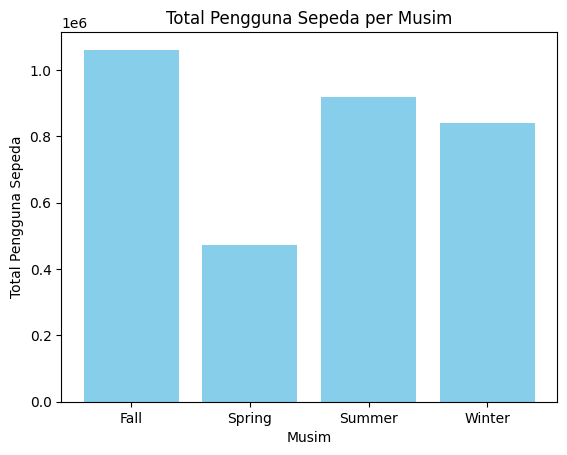

In [33]:
result = day_df.groupby('season_name').agg({'cnt': 'sum'})
plt.bar(result.index, result['cnt'], color='skyblue')

plt.title('Total Pengguna Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Pengguna Sepeda')

plt.show()

Dari Bar Chart ini kita bisa lihat ketika musim apa jumlah penyewaan tertinggi dan terendah.

## Conclusion

- Conclution pertanyaan 1
Jika kita lihat dari Line Chart, pada tahun 2011 jumlah penyewaan sepeda mulai meningkat ketika memasuki bulan ke-5 dan mulai menurun ketika mendekati bulan ke-11. sedangkan pada tahun 2021 peningkatan mulai terlihat ketika memasuki bulan ke ke-3 dan terus meningkat sampai bulan ke-9, lalu mulai menurun ketika memasuki bulan ke-10. Jumlah sewa tertinggi di tahun 2011 ada di bulan ke-5 dan di tahun 2012 ada di bulan ke-9.
- Conclution pertanyaan 2
Jika kita lihat dari Bar Chart, Jumlah penyewaan sepeda tertinggi ada pada musim 'Fall' dan terendah ada pada musim 'Spring'.